In [1]:

#@ Imports for preprocessing data
import pandas as pd
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
import string

In [2]:

#@ Converting integers to strings to understand each label independently.
categories = {1: 'Society & Culture', 2: 'Science & Mathematics', 3: 'Health', 4: 'Education & Reference',
              5: 'Computers & Internet', 6: 'Sports', 7: 'Business & Finance', 8: 'Entertainment & Music',
              9: 'Family & Relationships', 10: 'Politics & Government'} 

In [3]:
import numpy as np

In [5]:
raw_data = pd.read_csv('data/train.csv',
                       names=['class', 'title', 'content', 'answer'])

raw_data['class'] = raw_data['class'].map(categories)
raw_data.head(3) 

,class,title,content,answer
0,Computers & Internet,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,Sports,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,Health,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...


In [ ]:
raw_data.dropna(subset='title',inplace=True)
raw_data.dropna(subset='answer',inplace=True)
raw_data = raw_data.reset_index()

In [ ]:
data = raw_data.drop(["index", "content"], axis = 1)


In [ ]:
data.to_csv('yahoo_train_notnull.csv', index=False)  


In [ ]:
data.shape

In [ ]:
data

In [ ]:
#@ Remove capitalization, stopwords, and punctuation
def process(text) : 
    #@ Remove punctuation/captizalization
    text = str(text)
    text = text.lower()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    #@ Remove stopwords
    procList = [word for word in nopunc.split() if word not in stopwords.words('english')]
    return ' '.join(procList)

def cleanAndSave(source, dest) : 
    #@ Load data
    df = pd.read_csv(source, names=['class', 'title', 'answer'])
    X1, X2,  Y = df['title'], df['answer'], df['class']
    #@ Empty lists to append everything to one column
    title, answer, clss = [], [], []
    
    #@ Process text
    for i in range(0, len(X1)) :  
        title.append(process(X1[i]))
        answer.append(process(X2[i]))
        clss.append(Y[i])

    #@ Merge processed text columns into dataframe and save
    df = pd.DataFrame({"title" : title,  "answer" : answer, "class" : clss})
    df['text'] = df['title'].map(str) + ' ' + df['answer'].map(str)

    df_save = pd.DataFrame({'text': df['text'], "class" : df['class']})
    df_save.to_csv(dest, index=False)
    return df_save



In [5]:
%%time
# this cell could take uoto 2h!
# newdf_save = cleanAndSave('yahoo_train_notnull.csv', 'yahoo_train_notnull_clean.csv')
# print('done') 

CPU times: user 0 ns, sys: 1 µs, total: 1 µs
Wall time: 2.38 µs


In [5]:

#@ Imports
import ktrain 
from ktrain import text 
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";  

/home/hodfa840/miniconda3/envs/tf/lib/python3.9/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:

#@ Get cleaned dataset
path = 'yahoo_train_notnull_clean.csv'
cleaned_data = pd.read_csv(path) 

In [6]:

#@ Fix data for BERT model
cleaned_data = cleaned_data.sample(frac=0.03,random_state=70).reset_index(drop=True)
cleaned_data = cleaned_data[['class', 'text']]
cleaned_data = cleaned_data.drop(index=0)

cleaned_data.head(2) 


,class,text
1,Family & Relationships,dating guy go doesnt admit goes mean likes poi...
2,Computers & Internet,pay use sell something one ebay sell ebay yes ...


In [7]:
from sklearn.model_selection import train_test_split

# Load the DataFrame
df = cleaned_data

# Split the DataFrame into two parts with a 70:30 ratio and a random seed of 70
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=70)

In [8]:
# Split the remaining DataFrame into two parts with a 50:50 ratio and the same random seed
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Print the shape of the resulting DataFrames
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (28882, 2)
Validation set shape: (6189, 2)
Test set shape: (6190, 2)


In [9]:
%%time

(x_train, y_train),(X_temp, y_temp), preproc = text.texts_from_df(train_df=train_df,
                                                                 text_column='text',
                                                                 label_columns='class',
                                                                 maxlen=64,
                                                                 preprocess_mode='bert',
                                                                
                                                                 val_pct=0.3,
                                                                 random_state=70)


#preprocess_test method can be used here
(x_val, y_yal),(x_test, y_test), preproc = text.texts_from_df(train_df=temp_df,
                                                                 text_column='text',
                                                                 label_columns='class',
                                                                 maxlen=64,
                                                                 preprocess_mode='bert',
                                                                
                                                                 val_pct=0.5,
                                                                 random_state=42)


['Business & Finance', 'Computers & Internet', 'Education & Reference', 'Entertainment & Music', 'Family & Relationships', 'Health', 'Politics & Government', 'Science & Mathematics', 'Society & Culture', 'Sports']
       Business & Finance  Computers & Internet  Education & Reference  \
36576                 0.0                   0.0                    0.0   
38281                 0.0                   0.0                    0.0   
37259                 0.0                   0.0                    1.0   
34759                 0.0                   0.0                    0.0   
1583                  0.0                   1.0                    0.0   

       Entertainment & Music  Family & Relationships  Health  \
36576                    0.0                     0.0     0.0   
38281                    0.0                     0.0     0.0   
37259                    0.0                     0.0     0.0   
34759                    0.0                     1.0     0.0   
1583                 

Is Multi-Label? False
preprocessing test...
language: en


['Business & Finance', 'Computers & Internet', 'Education & Reference', 'Entertainment & Music', 'Family & Relationships', 'Health', 'Politics & Government', 'Science & Mathematics', 'Society & Culture', 'Sports']
       Business & Finance  Computers & Internet  Education & Reference  \
26600                 0.0                   0.0                    0.0   
32947                 0.0                   0.0                    0.0   
10887                 0.0                   0.0                    0.0   
10533                 0.0                   0.0                    0.0   
484                   0.0                   0.0                    0.0   

       Entertainment & Music  Family & Relationships  Health  \
26600                    0.0                     1.0     0.0   
32947                    0.0                     0.0     1.0   
10887                    0.0                     0.0     0.0   
10533                    0.0                     0.0     0.0   
484                  

Is Multi-Label? False
preprocessing test...
language: en


CPU times: user 13.6 s, sys: 0 ns, total: 13.6 s
Wall time: 13.9 s


In [10]:
%%time
model = text.text_classifier(name='bert',
                             train_data=(x_train, y_train),
                             preproc=preproc)  

Is Multi-Label? False
maxlen is 64


/home/hodfa840/miniconda3/envs/tf/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.
CPU times: user 2.94 s, sys: 211 ms, total: 3.16 s
Wall time: 6.66 s


In [12]:
#@ Setting up learner


learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_val, y_yal),
                             batch_size=32)   
     

In [17]:
%%time

learner.lr_find()


simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
4213/4213 [==============================] - 203s 48ms/step - loss: 9.9527 - accuracy: 0.2771


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.
CPU times: user 2min 36s, sys: 38.3 s, total: 3min 14s
Wall time: 3min 41s


In [11]:
import matplotlib.pyplot as plt


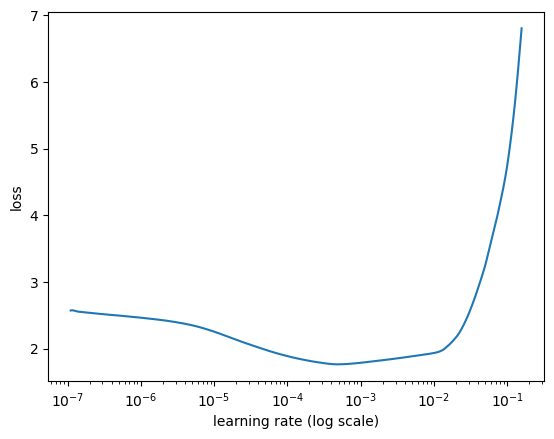

<Figure size 640x480 with 0 Axes>

In [24]:
learner.lr_plot(suggest=True)


In [30]:
# for other hyper param tunning:

%%time


train_df = train_df[1:]  # Remove the header row
import json
from ktrain import text

# Define a list of hyperparameters to try
learning_rates = [5e-5, 3e-5, 2e-5]
batch_sizes = [16, 32, 64]
num_epochs = [2, 3, 4]
maxlen_list = [64, 128, 256]

best_accuracy = 0.0
best_hyperparams = {}

# For each combination of hyperparameters...
for lr in learning_rates:
    for bs in batch_sizes:
        for ne in num_epochs:
            for maxlen in maxlen_list:
                # Preprocess the data
                (x_train, y_train), (x_val, y_val), preproc = text.texts_from_df(train_df, 'text', label_columns=['class'], preprocess_mode='bert', val_pct=0.3, maxlen=maxlen)
                
                # Build and train the BERT model
                model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
                learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_val, y_val), batch_size=bs)
                learner.fit_onecycle(lr, ne)
                
                # Evaluate the BERT model on validation set
                val_loss, val_accuracy = learner.validate(val_data=(x_val, y_val))
                print(f'Learning rate: {lr}, Batch size: {bs}, Number of epochs: {ne}, Maxlen: {maxlen}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')
                
                # Save the best hyperparameters based on validation accuracy
                if val_accuracy > best_accuracy:
                    best_accuracy = val_accuracy
                    best_hyperparams = {
                        'learning_rate': lr,
                        'batch_size': bs,
                        'num_epochs': ne,
                        'maxlen': maxlen
                    }

# Save the best hyperparameters to a file
with open('best_bert_hyperparams.txt', 'w') as file:
    json.dump(best_hyperparams, file)

# Load the best hyperparameters from the file
with open('best_bert_hyperparams.txt', 'r') as file:
    loaded_hyperparams = json.load(file)

# Use the loaded hyperparameters
loaded_learning_rate = loaded_hyperparams['learning_rate']
loaded_batch_size = loaded_hyperparams['batch_size']
loaded_num_epochs = loaded_hyperparams['num_epochs']
loaded_maxlen = loaded_hyperparams['maxlen']

# Build and train the BERT model with the loaded hyperparameters
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_val, y_val), batch_size=loaded_batch_size)
learner.fit_onecycle(loaded_learning_rate, loaded_num_epochs)

# Evaluate the final BERT model on the test set
test_loss, test_accuracy = learner.validate(val_data=(x_test, y_test))
print(f'\nBest Hyperparameters: {loaded_hyperparams}')
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

In [31]:
#print(dir(ktrain))


In [13]:
# Define the EarlyStopping callback
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)



In [16]:
#learner.fit_onecycle(1e-3, 12)


In [14]:
%%time
#0.0007
#learner.fit_onecycle(lr=1e-3, epochs=4, callbacks=[early_stopping]); 
#learner.fit(0.001, epochs=4, cycle_len=1, cycle_mult=2,callbacks=[early_stopping])

learner.autofit(9.53e-06, epochs=12,callbacks=[early_stopping])




begin training using triangular learning rate policy with max lr of 9.53e-06...
Epoch 1/12
632/632 [==============================] - 185s 275ms/step - loss: 1.3553 - accuracy: 0.5617 - val_loss: 0.9899 - val_accuracy: 0.6909
Epoch 2/12
632/632 [==============================] - 177s 281ms/step - loss: 0.9291 - accuracy: 0.7067 - val_loss: 0.9479 - val_accuracy: 0.7012
Epoch 3/12
632/632 [==============================] - 182s 288ms/step - loss: 0.8304 - accuracy: 0.7400 - val_loss: 0.9479 - val_accuracy: 0.7016
Epoch 4/12
632/632 [==============================] - 186s 294ms/step - loss: 0.7452 - accuracy: 0.7682 - val_loss: 0.9609 - val_accuracy: 0.7021
Epoch 5/12
632/632 [==============================] - 188s 297ms/step - loss: 0.6646 - accuracy: 0.7941 - val_loss: 0.9831 - val_accuracy: 0.7006
Epoch 6/12
632/632 [==============================] - 185s 293ms/step - loss: 0.5811 - accuracy: 0.8217 - val_loss: 1.0193 - val_accuracy: 0.6988
Epoch 7/12
632/632 [======================

In [15]:
# plot the validation and test accuracy
learner.validate(class_names=preproc.get_classes())


194/194 [==============================] - 18s 75ms/step
                        precision    recall  f1-score   support

    Business & Finance       0.44      0.52      0.48       624
  Computers & Internet       0.81      0.82      0.82       610
 Education & Reference       0.52      0.47      0.49       595
 Entertainment & Music       0.66      0.65      0.66       643
Family & Relationships       0.72      0.73      0.72       596
                Health       0.77      0.74      0.75       645
 Politics & Government       0.75      0.72      0.73       622
 Science & Mathematics       0.71      0.72      0.72       648
     Society & Culture       0.54      0.52      0.53       593
                Sports       0.87      0.88      0.88       613

              accuracy                           0.68      6189
             macro avg       0.68      0.68      0.68      6189
          weighted avg       0.68      0.68      0.68      6189



array([[325,  47,  28,  47,  27,  26,  45,  31,  37,  11],
       [ 45, 502,  14,  17,   7,   1,   3,   9,   8,   4],
       [ 70,  19, 279,  21,  11,  14,  36,  86,  49,  10],
       [ 63,  18,  26, 420,  23,  15,  10,   4,  48,  16],
       [ 44,   5,   6,  27, 433,  21,   4,   2,  49,   5],
       [ 39,   4,  21,  11,  27, 475,   6,  28,  23,  11],
       [ 62,   4,  39,  14,   9,   3, 446,   8,  32,   5],
       [ 27,   7,  59,  11,   7,  31,  11, 469,  13,  13],
       [ 53,   5,  58,  46,  52,  17,  29,  19, 311,   3],
       [ 12,   5,   6,  20,   4,  12,   4,   4,   7, 539]])

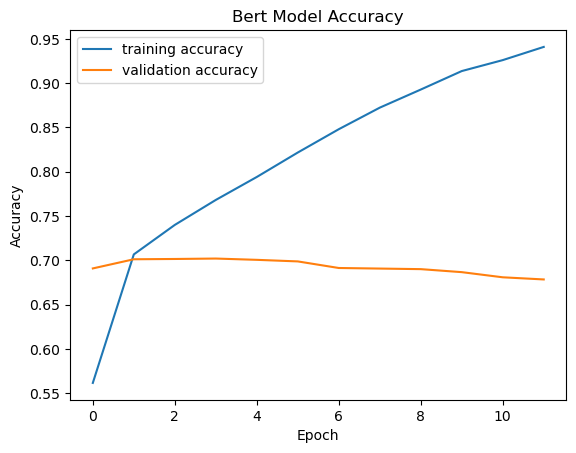

In [18]:
plt.plot(learner.history.history['accuracy'], label='training accuracy')
plt.plot(learner.history.history['val_accuracy'], label='validation accuracy')

plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.grid()
epochs = range(0,12,2)
plt.xticks(epochs)
plt.title('Bert Model Accuracy')
plt.legend()
plt.show()

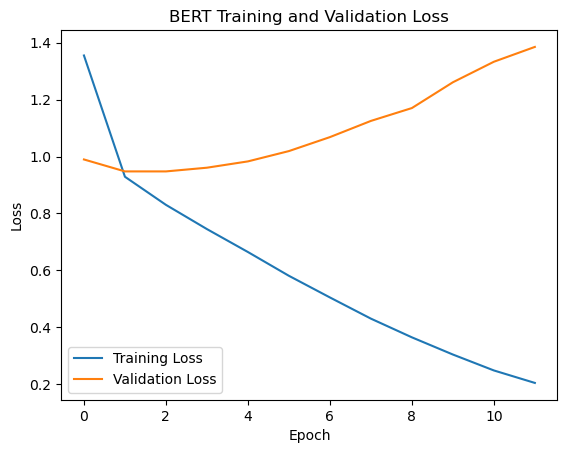

In [20]:
plt.plot(learner.history.history['loss'], label='Training Loss')
plt.plot(learner.history.history['val_loss'], label='Validation Loss')
epochs = range(0,12,2)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.title('BERT Training and Validation Loss')
plt.legend()
plt.show()


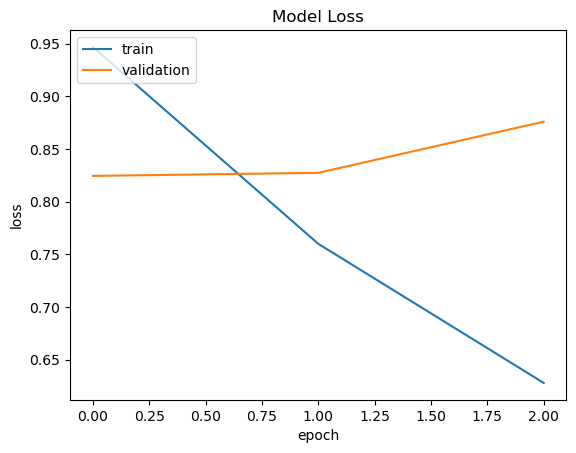

In [25]:
learner.plot('loss')
# plt.grid()
# epochs = range(1,3,1)
# plt.xticks(epochs)


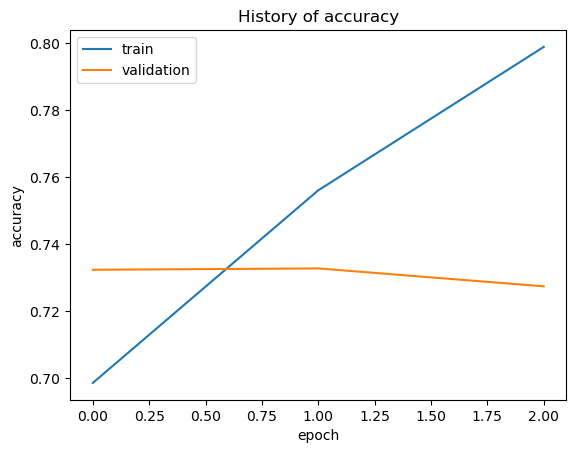

In [26]:
learner.plot('accuracy')


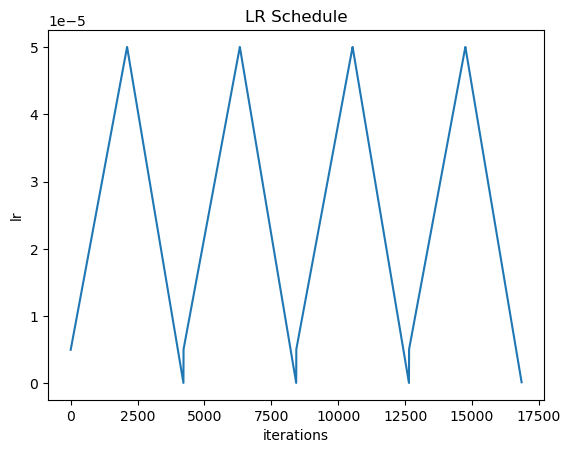

In [32]:
learner.plot('lr')


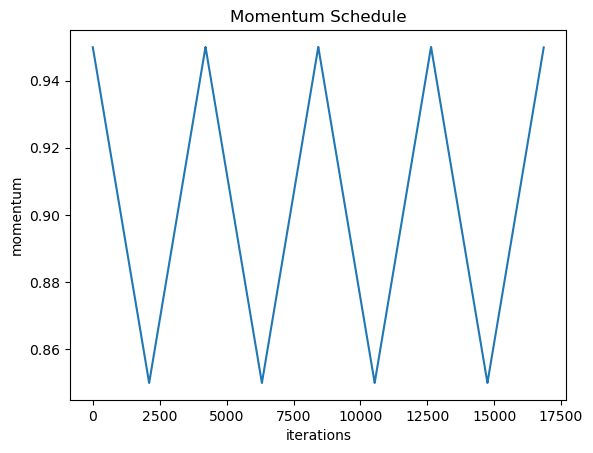

In [33]:
learner.plot('momentum')


In [30]:

#@ Get predictor using preproc dataset
predictor = ktrain.get_predictor(learner.model, preproc)   

In [31]:
classes = predictor.get_classes()  
classes
     

['Business & Finance',
 'Computers & Internet',
 'Education & Reference',
 'Entertainment & Music',
 'Family & Relationships',
 'Health',
 'Politics & Government',
 'Science & Mathematics',
 'Society & Culture',
 'Sports']

In [32]:
predictor.save('./save/bert_model3')
#predictor = ktrain.load_predictor('/save/bert_model2)


In [15]:
from ktrain import load_predictor

learner.load_model('save/bert_model3/')


In [33]:
from sklearn.metrics import roc_auc_score
y_pred = learner.model.predict(x_test, verbose=0)
score = roc_auc_score(y_test, y_pred)
print("\n ROC-AUC score: %.6f \n" % (score))


 ROC-AUC score: 0.950570 



In [34]:
from sklearn.metrics import accuracy_score

y_pred = learner.model.predict(x_test, verbose=0)
score = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) / len(np.argmax(y_test, axis=1))
print("\n Accuracy_scor score: %.6f \n" % (score))


 Accuracy_scor score: 0.729037 



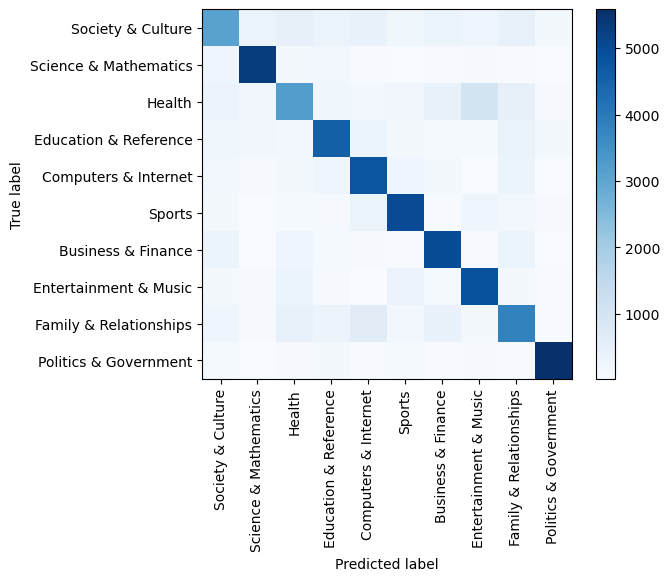

Accuracy: 0.7290367402333021


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the class labels
class_names = ['Society & Culture', 'Science & Mathematics', 'Health', 'Education & Reference', 'Computers & Internet', 
               'Sports', 'Business & Finance', 'Entertainment & Music', 'Family & Relationships', 'Politics & Government']

test_labels = y_test
# Make predictions on the test set
predictions = y_pred

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1))

# Visualize the confusion matrix as a heatmap
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(range(10), class_names, rotation=90)
plt.yticks(range(10), class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Calculate and print the accuracy
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(test_labels, axis=1)) / len(np.argmax(test_labels, axis=1))
print('Accuracy:', accuracy)


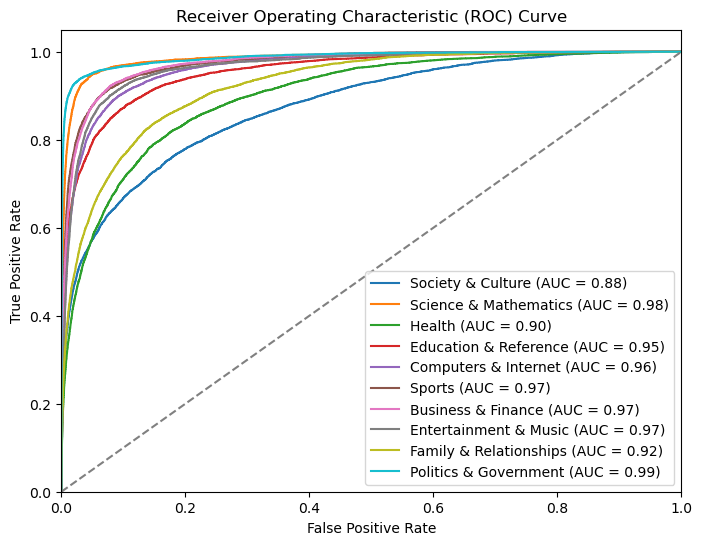

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib as mpl

mpl.rcParams['font.size'] = 10




# Make predictions on the test set
predictions =predictions

# Convert the labels to categorical format
test_labels_cat = test_labels

# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(test_labels_cat[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label='{} (AUC = {:.2f})'.format(class_names[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from prettytable import PrettyTable




class_names = ['Society & Culture', 'Science & Mathematics', 'Health', 'Education & Reference', 'Computers & Internet',
               'Sports', 'Business & Finance', 'Entertainment & Music', 'Family & Relationships', 'Politics & Government']


# Predict the probabilities for each class
y_pred = predictions

# Calculate the ROC curves and AUC for each class
num_classes = test_labels.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create a table of ROC curves for each class
table = PrettyTable()
table.field_names = ['Class', 'AUC', 'TPR at FPR = 0.01', 'TPR at FPR = 0.05', 'TPR at FPR = 0.1']
for i in range(num_classes):
    tpr_01 = np.interp(0.01, fpr[i], tpr[i])
    tpr_05 = np.interp(0.05, fpr[i], tpr[i])
    tpr_10 = np.interp(0.1, fpr[i], tpr[i])
    class_name = class_names[i]
    table.add_row([class_name, round( roc_auc[i],2), round(tpr_01,2), round(tpr_05,2), round(tpr_10,2)])
print(table)

+------------------------+------+-------------------+-------------------+------------------+
|         Class          | AUC  | TPR at FPR = 0.01 | TPR at FPR = 0.05 | TPR at FPR = 0.1 |
+------------------------+------+-------------------+-------------------+------------------+
|   Society & Culture    | 0.88 |        0.38       |        0.57       |       0.67       |
| Science & Mathematics  | 0.98 |        0.8        |        0.95       |       0.97       |
|         Health         | 0.9  |        0.33       |        0.58       |       0.71       |
| Education & Reference  | 0.95 |        0.58       |        0.79       |       0.87       |
|  Computers & Internet  | 0.96 |        0.55       |        0.83       |       0.91       |
|         Sports         | 0.97 |        0.67       |        0.88       |       0.93       |
|   Business & Finance   | 0.97 |        0.62       |        0.88       |       0.94       |
| Entertainment & Music  | 0.97 |        0.53       |        0.85     

In [39]:
import statistics
statistics.mean(list(roc_auc.values()))

0.9505697765947773

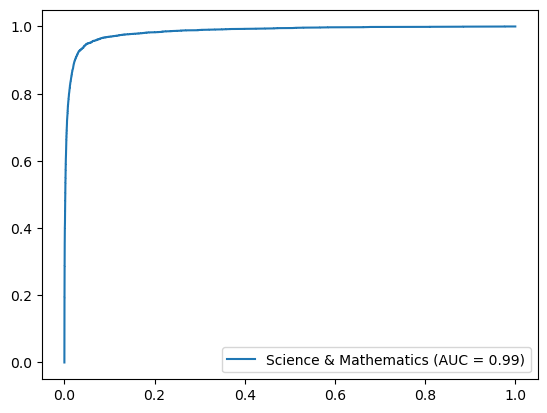

In [40]:
plt.plot(fpr[1], tpr[1], label='{} (AUC = {:.2f})'.format(class_names[1], roc_auc[i]))

plt.legend(loc='lower right')


In [20]:
# plot the validation and test accuracy
learner.validate(class_names=preproc.get_classes())


1935/1935 [==============================] - 170s 88ms/step
                        precision    recall  f1-score   support

    Business & Finance       0.61      0.50      0.55      6254
  Computers & Internet       0.84      0.88      0.86      6050
 Education & Reference       0.61      0.51      0.56      6210
 Entertainment & Music       0.72      0.73      0.72      6103
Family & Relationships       0.69      0.78      0.73      5905
                Health       0.77      0.80      0.79      6126
 Politics & Government       0.75      0.79      0.77      6149
 Science & Mathematics       0.73      0.79      0.76      6412
     Society & Culture       0.61      0.60      0.61      6287
                Sports       0.90      0.90      0.90      6398

              accuracy                           0.73     61894
             macro avg       0.72      0.73      0.72     61894
          weighted avg       0.72      0.73      0.72     61894



array([[3099,  373,  461,  354,  479,  249,  419,  275,  440,  105],
       [ 244, 5320,  117,  134,   53,   14,   36,   66,   36,   30],
       [ 399,  181, 3179,  253,  118,  157,  377,  945,  531,   70],
       [ 202,  195,  180, 4463,  321,  108,   87,   98,  321,  128],
       [ 156,   70,  101,  219, 4611,  240,  107,   12,  336,   53],
       [ 133,   26,  102,   93,  327, 4908,   65,  228,  183,   61],
       [ 327,   42,  254,  107,   89,   48, 4864,   62,  314,   42],
       [ 133,   61,  343,   93,   29,  368,   76, 5095,  160,   54],
       [ 286,   57,  417,  349,  616,  177,  402,  154, 3761,   68],
       [  68,   43,   68,  150,   59,   89,   57,   81,   55, 5728]])

In [22]:
class_names = ['Society & Culture', 'Science & Mathematics', 'Health', 'Education & Reference', 'Computers & Internet',
               'Sports', 'Business & Finance', 'Entertainment & Music', 'Family & Relationships', 'Politics & Government']


# Predict the probabilities for each class
y_pred = learner.model.predict(x_test, verbose=0)

In [23]:
from sklearn.metrics import classification_report
target_names = class_names
y_true = np.argmax(test_labels, axis=1) 
y_pred = np.argmax(y_pred, axis=1) 
print(classification_report(y_true=y_true,y_pred= y_pred, target_names=target_names))

                        precision    recall  f1-score   support

     Society & Culture       0.63      0.51      0.56      6053
 Science & Mathematics       0.83      0.87      0.85      6089
                Health       0.61      0.51      0.56      6276
 Education & Reference       0.73      0.73      0.73      6251
  Computers & Internet       0.70      0.78      0.74      6175
                Sports       0.77      0.81      0.79      6180
    Business & Finance       0.76      0.80      0.78      6194
 Entertainment & Music       0.71      0.79      0.75      6109
Family & Relationships       0.62      0.60      0.61      6331
 Politics & Government       0.90      0.90      0.90      6236

              accuracy                           0.73     61894
             macro avg       0.72      0.73      0.73     61894
          weighted avg       0.72      0.73      0.73     61894



In [19]:
from sklearn.metrics import accuracy_score

y_pred = learner.model.predict(x_test, verbose=0)
score = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) / len(np.argmax(y_test, axis=1))
print("\n Accuracy_scor score: %.6f \n" % (score))


 Accuracy_scor score: 0.684330 



In [21]:
test_labels = y_test


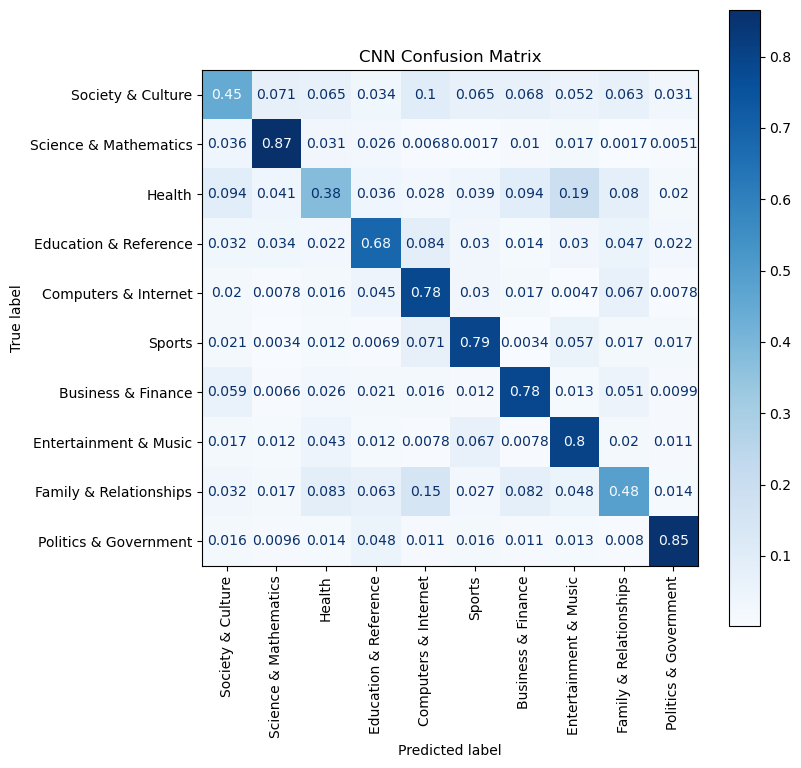

Accuracy: 0.684329563812601


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the class labels
class_names = ['Society & Culture', 'Science & Mathematics', 'Health', 'Education & Reference', 'Computers & Internet',
               'Sports', 'Business & Finance', 'Entertainment & Music', 'Family & Relationships', 'Politics & Government']

# Make predictions on the test set
predictions = y_pred

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1), normalize='true')

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('CNN Confusion Matrix')

# Add category labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Show the plot
plt.show()

# Calculate and print the accuracy
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(test_labels, axis=1)) / len(test_labels)
print('Accuracy:', accuracy)


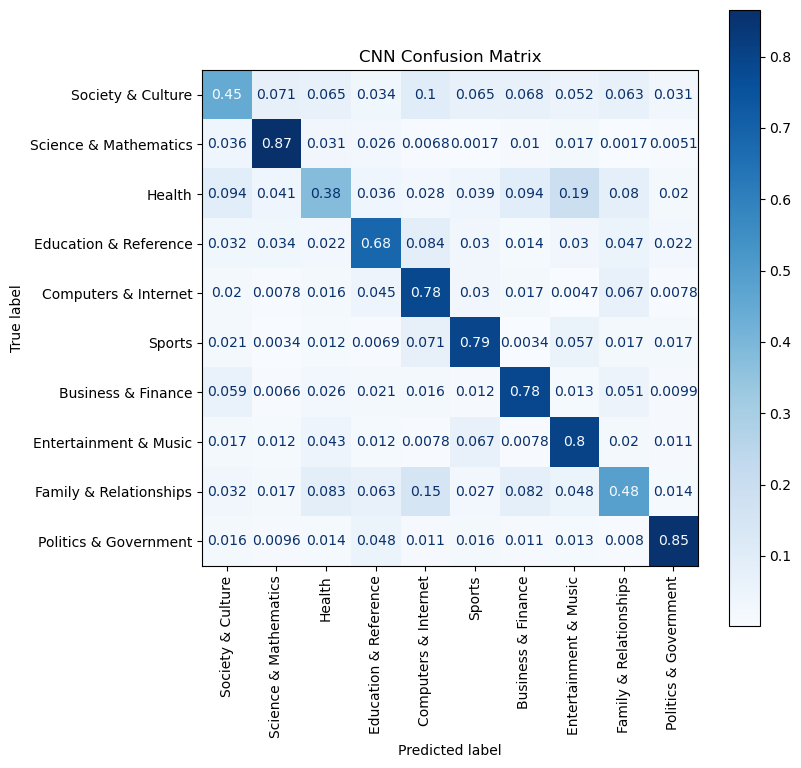

Accuracy: 0.684329563812601


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the class labels
class_names = ['Society & Culture', 'Science & Mathematics', 'Health', 'Education & Reference', 'Computers & Internet',
               'Sports', 'Business & Finance', 'Entertainment & Music', 'Family & Relationships', 'Politics & Government']

# Make predictions on the test set
predictions = y_pred

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1), normalize='true')

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Set labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('CNN Confusion Matrix')

# Add category labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Show the plot
plt.show()

# Calculate and print the accuracy
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(test_labels, axis=1)) / len(test_labels)
print('Accuracy:', accuracy)
